### Лабораторная работа №4 (вариант 8)

In [91]:
import math
import matplotlib.pyplot as plt
from scipy import integrate
import numpy as np

In [92]:
a = 16807
b = 16807
m = 2**31

In [93]:
class Generator1:
    def __init__(self, a, b, m):
        self.base = a
        self.a = a
        self.b = b
        self.m = m
        
    def rand(self):
        self.a = (self.a * self.b) % self.m
        return self.a / self.m
    
    def reset(self):
        self.a = self.base
        return self
    
    def get_period(self):
        period = 0
        while(period <= self.m):
            self.rand()
            period += 1
            if(self.a == self.base):
                return(period)
        return -1

In [94]:
list1 = []
gen1 = Generator1(a, b, m)

### 2. Датчик на основе нелинейных реккурентных формул

In [95]:
a = 16807
b = 16807
c = 37
g = 10
m = 2**31

In [96]:
# Период такого датчика будет равен M=2^31

In [97]:
class Generator2:
    def __init__(self, a, b, c, g, m):
        self.base = a
        self.a = a
        self.b = b
        self.c = c
        self.g = g
        self.m = m
        
    def reset(self):
        self.a = self.base
        return self
        
    def rand(self):
        self.a = (g * self.a * self.a + self.a * self.b + self.c) % self.m
        return self.a / self.m

In [98]:
list2 = []
gen2 = Generator2(a, b, c, g, m)

### 3. Датчик Маклорена-Марсальи (на основе двух предыдущих)

In [99]:
import math

In [100]:
k = 64

In [101]:
class Generator3:
    def __init__(self, k, gen1, gen2):
        self.k = k
        self.gen1 = gen1
        self.gen2 = gen2
        self.v = []
        for i in range(0, k):
            self.v.append(gen1.rand())
            
    def reset(self):
        self.gen1.reset()
        self.gen2.reset()
        self.v = []
        for i in range(0, k):
            self.v.append(gen1.rand())
        return self
        
    def rand(self):
        index = math.floor(self.gen2.rand() * self.k)
        value = self.v[index]
        self.v[index] = self.gen1.rand()
        return value

In [102]:
list3 = []
gen3 = Generator3(k, gen1.reset(), gen2.reset())

# Вычисление интегралов методом Монте-Карло

In [23]:
def avg(values):
    total = 0
    for val in values:
        total += val
    return total / len(values)

In [88]:
def get_diff(generate_func, exact_value, n_list):
    diffs = []
    for n in n_list:
        diff_for_specified_n = []
        
        for k in range(100):
            tmp = []
            
            for i in range(n):
                tmp.append(generate_func())
                
            approx_integral_value = avg(tmp)
            diff_for_specified_n.append(abs(approx_integral_value - exact_value))
            
        diffs.append(avg(diff_for_specified_n))
    return diffs

In [89]:
def plot_diff(diff, n_list):
    X, Y = np.array(n_list), np.array(diff)
    
    fig = plt.figure(figsize = [18, 8])

    plt.plot(X, Y, 'go')
    plt.plot(X, Y, 'g-')
    plt.show()

In [107]:
n_list1, n_list2, n_list3 = [], [], []

for i in np.arange(1, 100, 2):
    n_list1.append(i)
    
for i in np.arange(100, 1000, 50):
    n_list2.append(i)  
    
for i in np.arange(1000, 10000, 500):
    n_list3.append(i)  
    
exact_value1 = 1.37894
exact_value2 = 10/3

### 1. 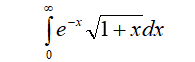

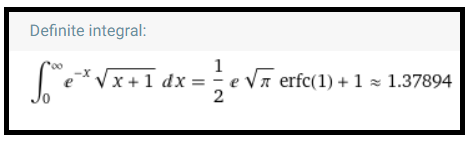

In [104]:
def gen_exp(a=1):
    y = gen3.rand()
    return (-1/a) * math.log(y)

In [105]:
def gen_f_exp():
    return np.sqrt(1 + gen_exp())

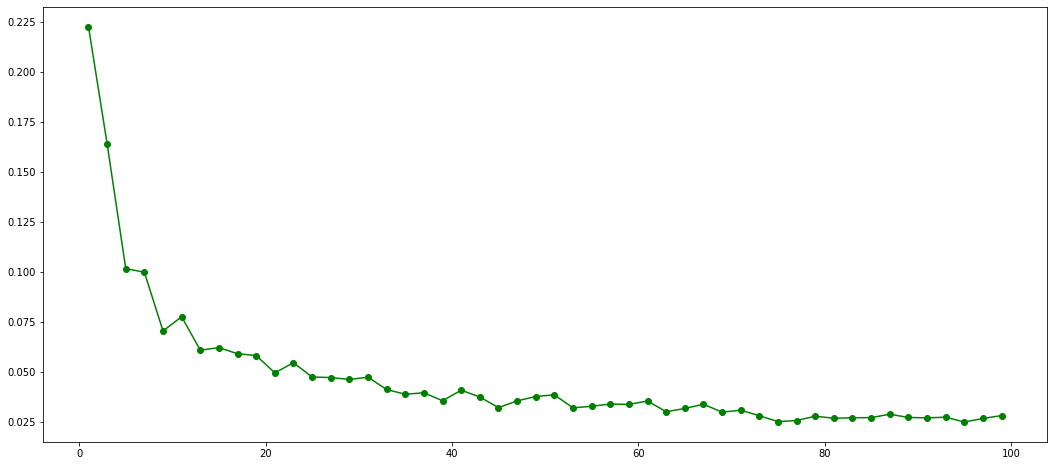

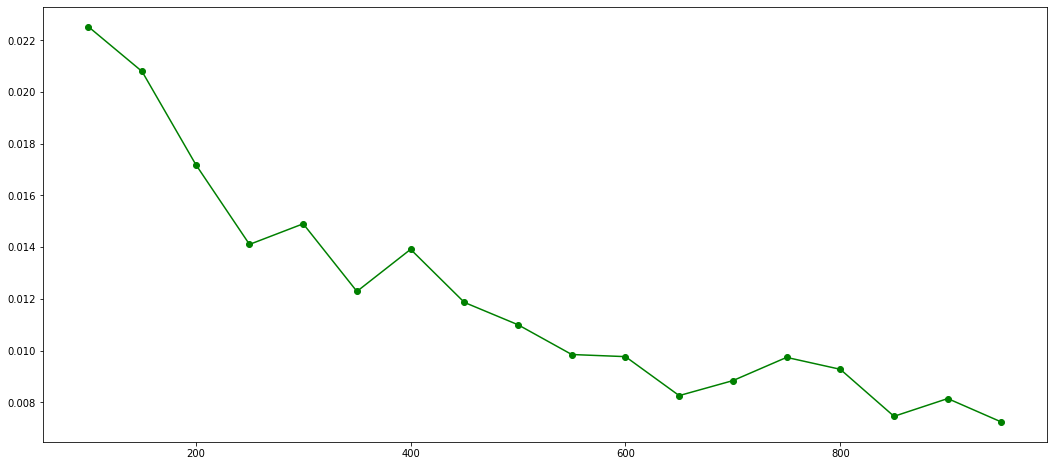

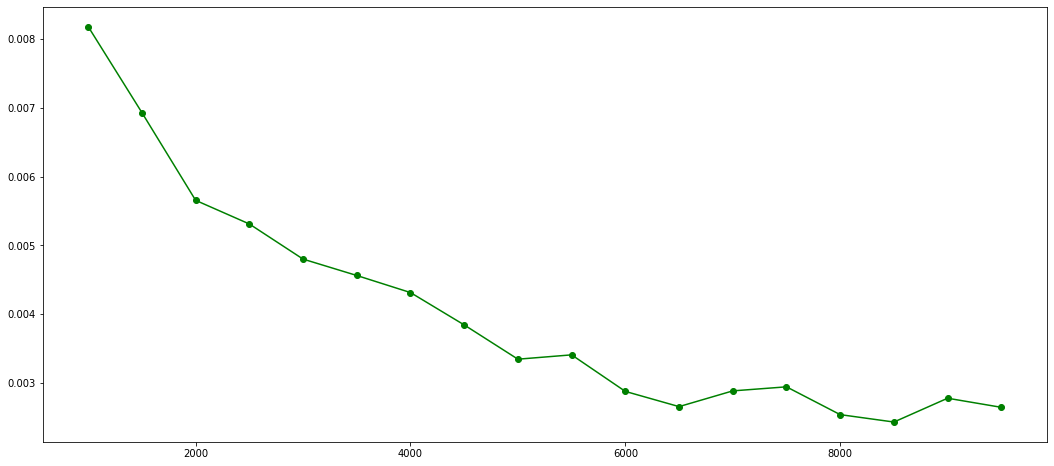

In [106]:
diff1 = get_diff(gen_f_exp, exact_value1, n_list1)
diff2 = get_diff(gen_f_exp, exact_value1, n_list2)
diff3 = get_diff(gen_f_exp, exact_value1, n_list3)

plot_diff(diff1, n_list1)
plot_diff(diff2, n_list2)
plot_diff(diff3, n_list3)

### 2. 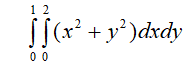

In [113]:
exact_value2 = 10/3

In [109]:
def gen_equal_distrib(a, b):
    y = gen3.rand()
    return (b-a)*y

In [110]:
def gen_f2():
    return 2*(gen_equal_distrib(0, 1)**2 + gen_equal_distrib(0, 2)**2)

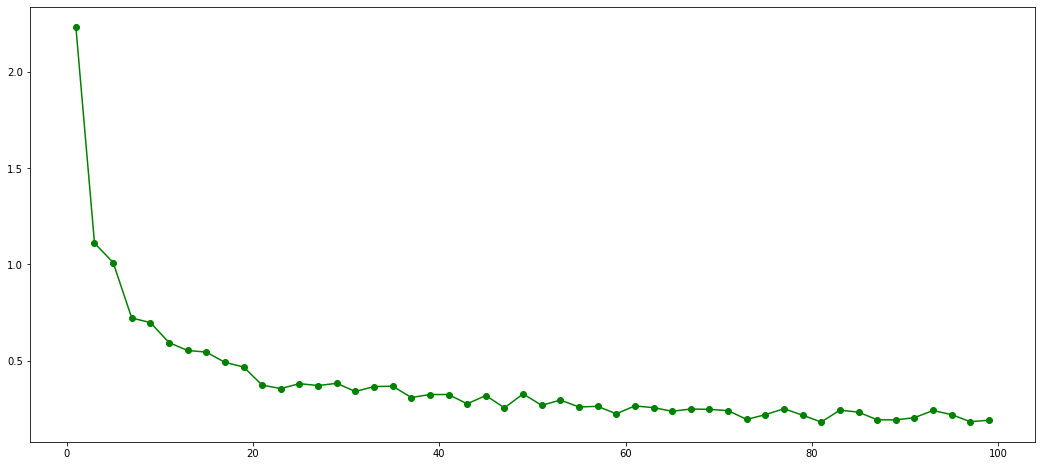

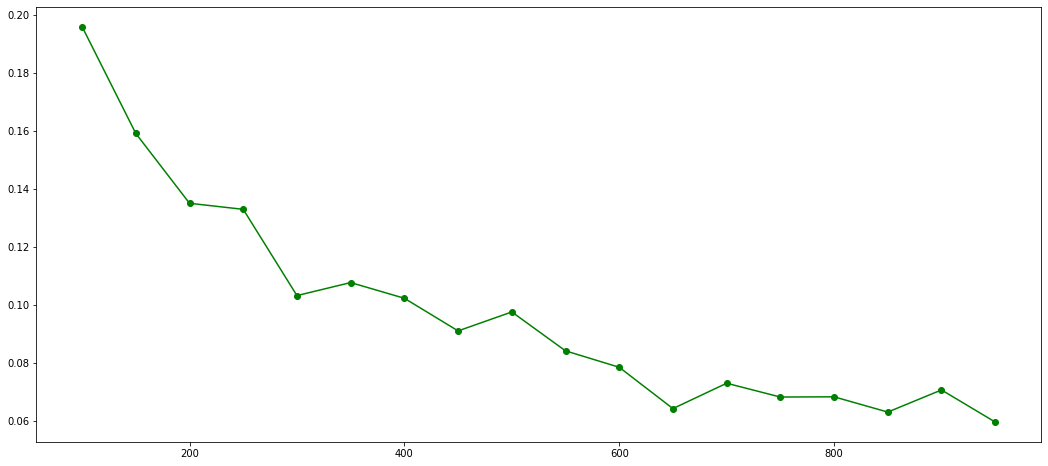

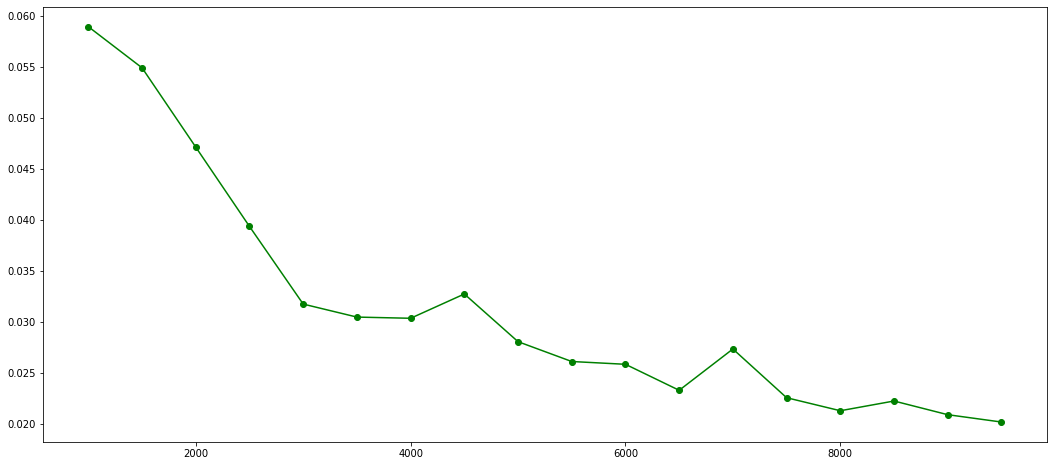

In [114]:
diff1 = get_diff(gen_f2, exact_value2, n_list1)
diff2 = get_diff(gen_f2, exact_value2, n_list2)
diff3 = get_diff(gen_f2, exact_value2, n_list3)

plot_diff(diff1, n_list1)
plot_diff(diff2, n_list2)
plot_diff(diff3, n_list3)